In [57]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data_train = pd.read_csv('train.csv')

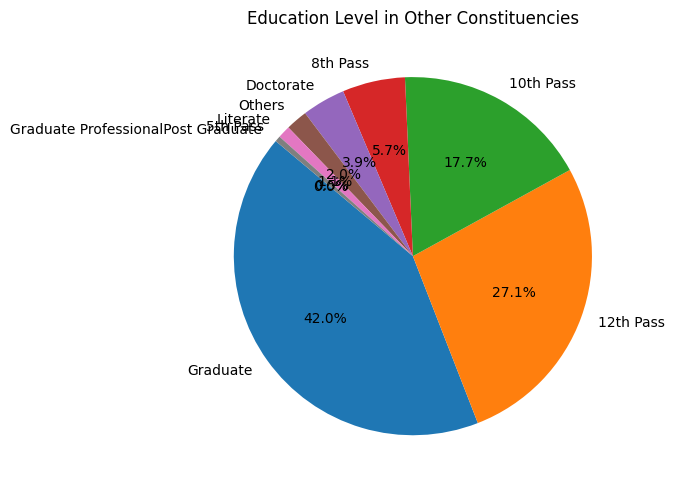

In [58]:
def Dr_to_int(x):
    if 'Dr.' in x:
        return 1
    else:
        return 0

def Adv_to_int(x):
    if 'Adv.' in x:
        return 1
    else:
        return 0

def SC_to_int(x):
    if 'SC' in x:
        return 1
    else:
        return 0

def ST_to_int(x):
    if 'ST' in x:
        return 1
    else:
        return 0
    
def convert_to_numeric(value):
    if 'Crore' in value:
        return float(value.split()[0]) * 10000000
    elif 'Lac' in value:
        return float(value.split()[0]) * 100000
    elif 'Thou' in value:
        return float(value.split()[0]) * 1000
    elif 'Hund' in value:
        return float(value.split()[0]) * 100
    else:
        return 0







df = data_train.copy()
df['Total Assets'] = df['Total Assets'].apply(convert_to_numeric)

# Convert 'Education' column to categorical type
df['Education'] = pd.Categorical(df['Education'], ordered=True, categories=['Others', 'Literate', '5th Pass', '8th Pass', '10th Pass', '12th Pass', 'Graduate', 'Graduate Professional' 'Post Graduate', 'Doctorate'])

total_candidates_per_party = df.groupby('Party')['ID'].count()

# Filter data based on conditions
more_than_1_case = df[df['Criminal Case'] > 1]
more_than_1_crore_assets = df[df['Total Assets'] > 1e+07]
more_than_12th_pass_education = df[df['Education'] >= '12th Pass']

# Count the number of people in each party for each condition
party_with_more_than_1_case = more_than_1_case.groupby('Party')['ID'].count()
party_with_more_than_1_crore_assets = more_than_1_crore_assets.groupby('Party')['ID'].count()
party_with_more_than_12th_pass_education = more_than_12th_pass_education.groupby('Party')['ID'].count()

normalized_party_with_more_than_1_case = party_with_more_than_1_case / total_candidates_per_party
normalized_party_with_more_than_1_crore_assets = party_with_more_than_1_crore_assets / total_candidates_per_party
normalized_party_with_more_than_12th_pass_education = party_with_more_than_12th_pass_education / total_candidates_per_party

sc_constituencies = df[df['Constituency ∇'].str.contains('SC')]
st_constituencies = df[df['Constituency ∇'].str.contains('ST')]
other_constituencies = df[~df['Constituency ∇'].str.contains('SC|ST')]

# Count the education levels for each filtered constituency
sc_education_counts = sc_constituencies['Education'].value_counts()
st_education_counts = st_constituencies['Education'].value_counts()
other_education_counts = other_constituencies['Education'].value_counts()

# Plotting the graphs
plt.figure(figsize=(15, 5))

# Plotting number of people with more than 1 criminal case for each party
# plt.subplot(1, 3, 1)
# party_with_more_than_1_case.plot(kind='bar', color='skyblue')
# plt.title('Number of People with More than 1 Criminal Case')
# plt.xlabel('Party')
# plt.ylabel('Number of People')

# # Plotting number of people with more than 1 crore+ assets for each party
# plt.subplot(1, 3, 2)
# party_with_more_than_1_crore_assets.plot(kind='bar', color='lightgreen')
# plt.title('Number of People with More than 1 Crore+ Assets')
# plt.xlabel('Party')
# plt.ylabel('Number of People')

# # Plotting number of people with more than 12th Pass education for each party
# plt.subplot(1, 3, 3)
# party_with_more_than_12th_pass_education.plot(kind='bar', color='lightcoral')
# plt.title('Number of People with More than 12th Pass Education')
# plt.xlabel('Party')
# plt.ylabel('Number of People')

# plt.subplot(1, 3, 1)
# normalized_party_with_more_than_1_case.plot(kind='bar', color='skyblue')
# plt.title('Normalized Number of People with More than 1 Criminal Case')
# plt.xlabel('Party')
# plt.ylabel('Proportion of People')

# # Plotting number of people with more than 1 crore+ assets for each party
# plt.subplot(1, 3, 2)
# normalized_party_with_more_than_1_crore_assets.plot(kind='bar', color='lightgreen')
# plt.title('Normalized Number of People with More than 1 Crore+ Assets')
# plt.xlabel('Party')
# plt.ylabel('Proportion of People')

# # Plotting number of people with more than 12th Pass education for each party
# plt.subplot(1, 3, 3)
# normalized_party_with_more_than_12th_pass_education.plot(kind='bar', color='lightcoral')
# plt.title('Normalized Number of People with More than 12th Pass Education')
# plt.xlabel('Party')
# plt.ylabel('Proportion of People')

# Pie chart for SC constituencies
# plt.subplot(1, 3, 1)
# plt.pie(sc_education_counts, labels=sc_education_counts.index, autopct='%1.1f%%', startangle=140)
# plt.title('Education Level in SC Constituencies')

# # Pie chart for ST constituencies
# plt.subplot(1, 3, 2)
# plt.pie(st_education_counts, labels=st_education_counts.index, autopct='%1.1f%%', startangle=140)
# plt.title('Education Level in ST Constituencies')

# # Pie chart for other constituencies
# plt.subplot(1, 3, 3)
plt.pie(other_education_counts, labels=other_education_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Education Level in Other Constituencies')

plt.tight_layout()
plt.show()











data_train['Dr'] = data_train['Candidate'].apply(Dr_to_int)
data_train['Adv'] = data_train['Candidate'].apply(Adv_to_int)
data_train['SC'] = data_train['Constituency ∇'].apply(SC_to_int)
data_train['ST'] = data_train['Constituency ∇'].apply(ST_to_int)
data_train['Total Assets'] = data_train['Total Assets'].apply(convert_to_numeric)
data_train['Liabilities'] = data_train['Liabilities'].apply(convert_to_numeric)

In [16]:
Y = data_train['Education']
data_train.drop(['Candidate', 'Constituency ∇', 'Education'], axis=1, inplace=True)
X = pd.get_dummies(data_train)
print(X.head())

   ID  Criminal Case  Total Assets  Liabilities  Dr  Adv  SC  ST  Party_AAP  \
0   0              4  2.110000e+09   20000000.0   0    0   0   0          0   
1   1              0  1.000000e+07          0.0   0    0   1   0          0   
2   2              0  7.000000e+07    2200000.0   1    0   0   0          0   
3   3              0  9.000000e+07    2400000.0   0    0   0   0          0   
4   4              2  2.000000e+07    6100000.0   0    0   1   0          0   

   Party_AIADMK  ...  state_ODISHA  state_PUDUCHERRY  state_PUNJAB  \
0             0  ...             0                 0             0   
1             0  ...             0                 0             0   
2             0  ...             0                 0             0   
3             0  ...             0                 0             0   
4             0  ...             0                 0             0   

   state_RAJASTHAN  state_SIKKIM  state_TAMIL NADU  state_TRIPURA  \
0                0             0   

In [17]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

parameter_dictionary = {
    'n_estimators': randint(10, 1000),
    'random_state': [42, 25, 47]
}
rs = RandomizedSearchCV(RandomForestClassifier(), param_distributions=parameter_dictionary, n_iter=10, cv=5)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
rs.fit(X_train, Y_train)
best_params = rs.best_params_
print("Best parameters:", best_params)

Best parameters: {'n_estimators': 297, 'random_state': 47}


In [18]:
from sklearn.metrics import accuracy_score
Y_pred = rs.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.25970873786407767


In [20]:
rf = RandomForestClassifier(n_estimators= best_params['n_estimators'], random_state=best_params['random_state'])
rf.fit(X, Y)

RandomForestClassifier(n_estimators=297, random_state=47)

In [21]:
data_test = pd.read_csv('test.csv')
data_test['Dr'] = data_test['Candidate'].apply(Dr_to_int)
data_test['Adv'] = data_test['Candidate'].apply(Adv_to_int)
data_test['SC'] = data_test['Constituency ∇'].apply(SC_to_int)
data_test['ST'] = data_test['Constituency ∇'].apply(ST_to_int)
data_test['Total Assets'] = data_test['Total Assets'].apply(convert_to_numeric)
data_test['Liabilities'] = data_test['Liabilities'].apply(convert_to_numeric)
data_test.drop(['Candidate', 'Constituency ∇'], axis=1, inplace=True)
X_test = pd.get_dummies(data_test)
Y_pred = rf.predict(X_test)

In [22]:
submission = pd.DataFrame({'ID': range(1, len(Y_pred) + 1), 'Education': Y_pred})
submission['ID'] = submission['ID'] - 1
submission.to_csv('submission.csv', index=False)